In [1]:
from pathlib import Path
from shutil import copyfile
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numbers
import matplotlib.patches as patches

In [2]:
np.random.seed(0)

In [3]:
def crop(img, top, left, height, width):

    return img.crop((left, top, left + width, top + height))

In [4]:
def center_crop(img, output_size):

    if isinstance(output_size, numbers.Number):
        output_size = (int(output_size), int(output_size))
    image_width, image_height = img.size
    crop_height, crop_width = output_size
    crop_top = int(round((image_height - crop_height) / 2.))
    crop_left = int(round((image_width - crop_width) / 2.))
    return crop(img, crop_top, crop_left, crop_height, crop_width)

In [5]:
def five_crop(img, size):

    if isinstance(size, numbers.Number):
        size = (int(size), int(size))
    else:
        assert len(size) == 2, "Please provide only two dimensions (h, w) for size."

    image_width, image_height = img.size
    crop_height, crop_width = size
    if crop_width > image_width or crop_height > image_height:
        msg = "Requested crop size {} is bigger than input size {}"
        raise ValueError(msg.format(size, (image_height, image_width)))

    tl = img.crop((0, 0, crop_width, crop_height))
    tr = img.crop((image_width - crop_width, 0, image_width, crop_height))
    bl = img.crop((0, image_height - crop_height, crop_width, image_height))
    br = img.crop((image_width - crop_width, image_height - crop_height,
                   image_width, image_height))
    center = center_crop(img, (crop_height, crop_width))
    return [tl, tr, bl, br, center]

In [6]:
def ten_crop(img, size, vertical_flip=False):

    if isinstance(size, numbers.Number):
        size = (int(size), int(size))
    else:
        assert len(size) == 2, "Please provide only two dimensions (h, w) for size."

    first_five = five_crop(img, size)

    img_2 = img.transpose(Image.FLIP_LEFT_RIGHT)

    second_five = five_crop(img_2, size)
    return first_five + second_five

In [7]:
def resize(imgs, resize_size):
    return [img.resize(resize_size) for img in imgs]

In [8]:
level = '200X'
if os.path.isdir('/home/victor/sys866/DiscriminativeActiveLearning/breakhis'):
        train_path = '/home/victor/sys866/DiscriminativeActiveLearning/breakhis/train/{}/'.format(level)
        test_path = '/home/victor/sys866/DiscriminativeActiveLearning/breakhis/test/{}/'.format(level)
else:
    train_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/breakhis/train/{}/'.format(level)
    test_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/breakhis/test/{}/'.format(level)
train_files = [str(path) for path in Path(train_path).rglob('*.png')]
test_files = [str(path) for path in Path(test_path).rglob('*.png')]

### Patch visualization

In [9]:
sample = Image.open(train_files[750])
sample.size

(700, 460)

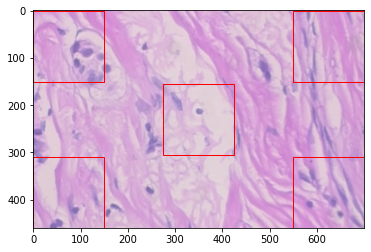

In [10]:
fig,ax = plt.subplots(1)
ax.imshow(sample)

top_left = patches.Rectangle((0,0), 150, 150,linewidth=1,edgecolor='r',facecolor='none')
top_right = patches.Rectangle((700-150,0), 150, 150,linewidth=1,edgecolor='r',facecolor='none')

bottom_left = patches.Rectangle((0,460-150), 150, 150,linewidth=1,edgecolor='r',facecolor='none')
bottom_right = patches.Rectangle((700-150, 460-150), 150, 150,linewidth=1,edgecolor='r',facecolor='none')

image_width, image_height = 700, 460
crop_height, crop_width = (150,150)
crop_top = int(round((image_height - crop_height) / 2.))
crop_left = int(round((image_width - crop_width) / 2.))
center = patches.Rectangle((crop_left,crop_top), 150, 150,linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(top_left)
ax.add_patch(top_right)
ax.add_patch(bottom_left)
ax.add_patch(bottom_right)
ax.add_patch(center)

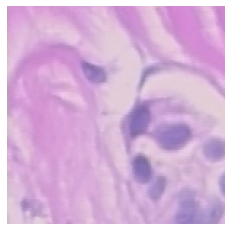

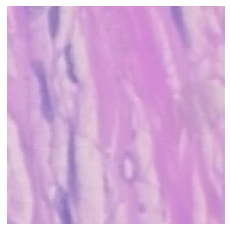

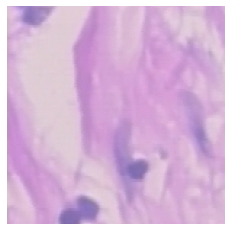

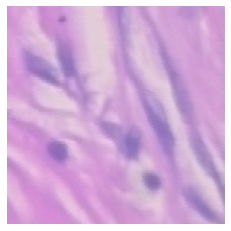

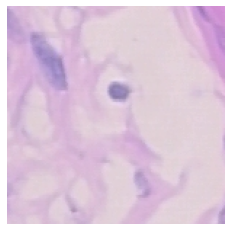

In [11]:
crops = five_crop(sample, (150,150))
for crop in crops:
    plt.figure()
    plt.axis('off')
    plt.imshow(crop)

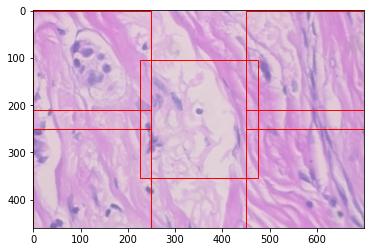

In [11]:
fig,ax = plt.subplots(1)
ax.imshow(sample)

top_left = patches.Rectangle((0,0), 250, 250,linewidth=1,edgecolor='r',facecolor='none')
top_right = patches.Rectangle((700-250,0), 250, 250,linewidth=1,edgecolor='r',facecolor='none')

bottom_left = patches.Rectangle((0,460-250), 250, 250,linewidth=1,edgecolor='r',facecolor='none')
bottom_right = patches.Rectangle((700-250, 460-250), 250, 250,linewidth=1,edgecolor='r',facecolor='none')

image_width, image_height = 700, 460
crop_height, crop_width = (250,250)
crop_top = int(round((image_height - crop_height) / 2.))
crop_left = int(round((image_width - crop_width) / 2.))
center = patches.Rectangle((crop_left,crop_top), 250, 250,linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(top_left)
ax.add_patch(top_right)
ax.add_patch(bottom_left)
ax.add_patch(bottom_right)
ax.add_patch(center)
# plt.axis('off')
plt.savefig('break_crops_ppt.png', transparent=True, quality=100)

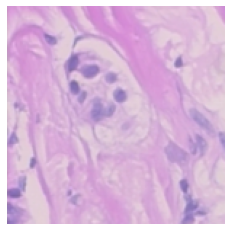

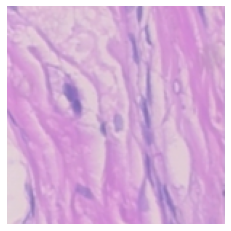

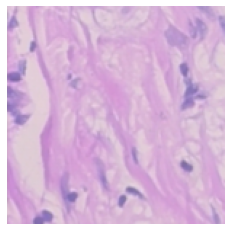

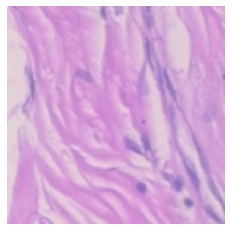

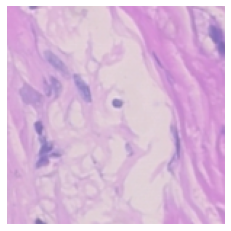

In [12]:
crops = five_crop(sample, (300,300))
crops = resize(crops, (150,150))
for crop in crops:
    plt.figure()
    plt.axis('off')
    plt.imshow(crop)

### Extraction

In [ ]:
def load_breakhis(level, mode='single'):

    assert mode in ['single', 'five', 'ten']
    
    if os.path.isdir('/home/victor/sys866/DiscriminativeActiveLearning/breakhis'):
        train_path = '/home/victor/sys866/DiscriminativeActiveLearning/breakhis/train/{}/'.format(level)
        test_path = '/home/victor/sys866/DiscriminativeActiveLearning/breakhis/test/{}/'.format(level)
    else:
        train_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/breakhis/train/{}/'.format(level)
        test_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/breakhis/test/{}/'.format(level)

    train_files = [str(path) for path in Path(train_path).rglob('*.png')]
    test_files = [str(path) for path in Path(test_path).rglob('*.png')]

    X_train, y_train = parse_breakhis_files(train_files, mode)
    X_test, y_test = parse_breakhis_files(test_files, mode)

    X_train = np.array(X_train).astype('float32') / 255
    X_test = np.array(X_test).astype('float32') / 255
    
    # shuffle the train data:
    perm = np.random.permutation(X_train.shape[0])
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    # shuffle the test data:
    perm = np.random.permutation(X_test.shape[0])
    X_test = X_test[perm]
    y_test = y_test[perm]
    
    return (X_train, y_train), (X_test, y_test)

In [ ]:
def get_breakhis_label(file):
    if 'benign' in file:
        return 0
    else:
        return 1

In [ ]:
def parse_breakhis_files(files, mode='single', crop_size=(300,300), resize_size=(150,150)):
    modes = {
        'single': (center_crop, 1),
        'five' : (five_crop, 5),
        'ten' : (ten_crop, 10)
    }
    
    croper, multiplier = modes[mode]
    
    X = []
    y = []
    
    for file in files:
        img = Image.open(file)
        imgs = croper(img, crop_size)
        if mode is not 'single':
            imgs = resize(imgs, resize_size)
            np_imgs = [np.array(pic) for pic in imgs]
            X.extend(np_imgs)
            y.extend(multiplier * [get_breakhis_label(file)])
        else:
            imgs = imgs.resize(resize_size)
            np_imgs = np.array(imgs)
            X.append(np_imgs)
            y.append(get_breakhis_label(file))
        break
    X = np.asarray(X, dtype='uint8')
    y = np.asarray(y, dtype='uint8')
    return X, y

In [ ]:
(X_train, y_train), (X_test, y_test) = load_breakhis(level, 'ten')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
base_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/breakhis/numpy_300/{}'.format(level)
path_format = base_path + '/{}'
p = Path(base_path)
p.mkdir(parents=True, exist_ok=True)

In [ ]:
np.save(path_format.format('X_train_ten'), X_train)
np.save(path_format.format('y_train_ten'), y_train)
np.save(path_format.format('X_test_ten'), X_test)
np.save(path_format.format('y_test_ten'), y_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = load_breakhis(level, 'five')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
np.save(path_format.format('X_train_five'), X_train)
np.save(path_format.format('y_train_five'), y_train)
np.save(path_format.format('X_test_five'), X_test)
np.save(path_format.format('y_test_five'), y_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = load_breakhis(level, 'single')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
np.save(path_format.format('X_train_single'), X_train)
np.save(path_format.format('y_train_single'), y_train)
np.save(path_format.format('X_test_single'), X_test)
np.save(path_format.format('y_test_single'), y_test)

In [ ]:
def load_breakhis_from_np(level, mode):
    assert mode in ['single', 'five', 'ten']
    
    path_format = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/breakhis/numpy/{}/'.format(level)
    x_train_file = 'X_train_{}.npy'.format(mode)
    y_train_file = 'y_train_{}.npy'.format(mode)    
    x_test_file = 'X_test_{}.npy'.format(mode)  
    y_test_file = 'y_test_{}.npy'.format(mode)
    
    X_train = np.load(path_format + x_train_file)
    y_train = np.load(path_format + y_train_file)
    X_test = np.load(path_format + x_test_file)
    y_test = np.load(path_format + y_test_file)
    
    return (X_train, y_train), (X_test, y_test)    

In [ ]:
# (X_train, y_train), (X_test, y_test) = load_breakhis_from_np(level, 'single')
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
(X_train, y_train), (X_test, y_test) = load_breakhis_from_np(level, 'five')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# (X_train, y_train), (X_test, y_test) = load_breakhis_from_np(level, 'ten')
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
c1_count = 0
c2_count = 0
initial_labelled_pool = 100
c1_max = initial_labelled_pool / 2
c2_max = initial_labelled_pool / 2
indices = []
vals = []

In [ ]:
for i in range(y_train.shape[0]):
    if y_train[i] == 0 and c1_count < c1_max:
        indices.append(i)
        c1_count += 1
        vals.append(y_train[i])
    elif y_train[i] == 1 and c2_count < c2_max:
        indices.append(i)
        c2_count += 1
        vals.append(y_train[i])
    elif c1_count >= c1_max and c2_count >= c2_max:
        break
vals = np.array(vals)

In [ ]:
vals.sum()

In [ ]:
vals

In [ ]:
import pickle

In [ ]:
with open('break_balanced_100_start.pkl', 'wb') as f:
        pickle.dump(np.array(indices), f)

In [ ]:
loaded = np.load('break_balanced_100_start.pkl', allow_pickle=True)